<a href="https://colab.research.google.com/github/BogdanT54/Serii-de-Timp/blob/Proiect/Analiza_S%26P500_%2B_Meta_Proiect_SERII_TIMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Caiet lucru analiza S&P 500 (2015-2025)**

Cerinte:

o   Prezentarea problemei

o   Surse de date (se extrag douƒÉ serii de timp, posibil interdependente)

o   Modele econometrice folosite

    - estimarea unui model univariat de timp pentru fiecare serie de timp

    - estimarea unui model multivariat pentru interdependen»õa dintre ele

o   Concluzii »ôi interpretƒÉri

  √én realizarea proiectului se va avea √Æn vederea ilustrarea urmƒÉtoarelor concepte de analizƒÉ a seriilor de timp:

1.      Modele cu trend determinist sau stochastic

2.      Serii sta»õionare

3.      Modele ARMA-ARIMA-SARIMA

4.      Predic»õia punctualƒÉ »ôi predic»õia pe interval de √Æncredere

5.      Modele de cointegrare »ôi modele VAR.


In [1]:
# InstaleazƒÉ pachetele necesare (rulat o singurƒÉ datƒÉ)
!pip3 install yfinance statsmodels arch seaborn

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 985.3/985.3 kB 12.3 MB/s eta 0:00:00


In [42]:
# Importuri
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.stattools as ts
from google.colab import files
from arch.unitroot import ADF, PhillipsPerron, KPSS
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore')

In [11]:
#Fac un dataframe cu fisierul dat
sp500 = pd.read_csv('sp500.csv', index_col=0, parse_dates=True)

#Verific Df-ul
sp500.head()

High          Low         Open        Close        Volume  \
Date                                                                           
2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088  3.587980e+09   
2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893  3.884930e+09   
2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117  2.852940e+09   
2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117  2.852940e+09   
2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107  1.466840e+09   

              Adj Close  
Date                     
2015-11-23  2086.590088  
2015-11-24  2089.139893  
2015-11-25  2088.870117  
2015-11-26  2088.870117  
2015-11-27  2090.110107

In [19]:
#Prelucram randamentele logaritmice si curatam valorile lipsa
sp500_log_returns = np.log(sp500 / sp500.shift(1)).replace([np.inf, -np.inf], np.nan).dropna()

#Afisez
sp500_log_returns.head()

High       Low      Open     Close    Volume  Adj Close
Date                                                                   
2015-11-24 -0.000711 -0.005347 -0.002391  0.001221  0.079516   0.001221
2015-11-25 -0.000535  0.007703  0.002339 -0.000129 -0.308755  -0.000129
2015-11-26  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000
2015-11-27  0.000139 -0.001041 -0.000230  0.000593 -0.665240   0.000593
2015-11-28  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000

In [20]:
#Descarc datele OHLC pentru ticker-ul META (Perioada similara cu cea a S&P500 din csv)
meta = yf.download('META', start='2015-11-23', end='2025-11-20')
meta.head()

[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open    Volume
Ticker            META        META        META        META      META
Date                                                                
2015-11-23  106.448303  106.965868  105.582389  106.687183  19897200
2015-11-24  105.243980  105.990462  103.900315  105.502763  23577300
2015-11-25  104.915527  106.099940  104.606976  105.831210  15150800
2015-11-27  104.955338  105.462947  104.368109  105.283791   5913100
2015-11-30  103.751015  105.602290  103.263315  105.343508  20383200

In [21]:
#Prelucram randamentele logaritmice si curatam valorile lipsa
meta_log_returns = np.log(meta / meta.shift(1)).replace([np.inf, -np.inf], np.nan).dropna()
meta_log_returns.head()

Price          Close      High       Low      Open    Volume
Ticker          META      META      META      META      META
Date                                                        
2015-11-24 -0.011378 -0.009161 -0.016060 -0.011164  0.169705
2015-11-25 -0.003126  0.001032  0.006778  0.003108 -0.442231
2015-11-27  0.000379 -0.006022 -0.002286 -0.005186 -0.940883
2015-11-30 -0.011541  0.001320 -0.010642  0.000567  1.237541
2015-12-01  0.027254  0.009848  0.007203 -0.009588  0.111255

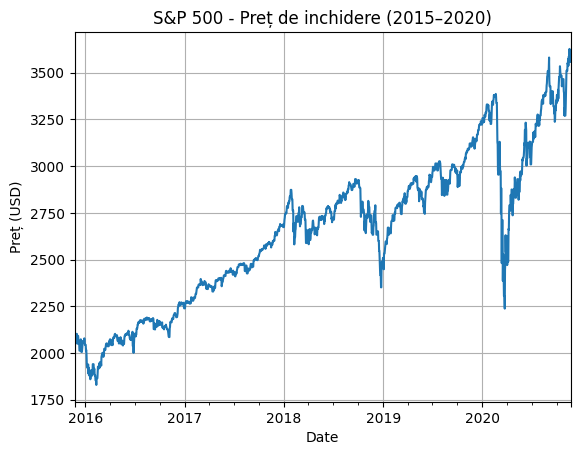

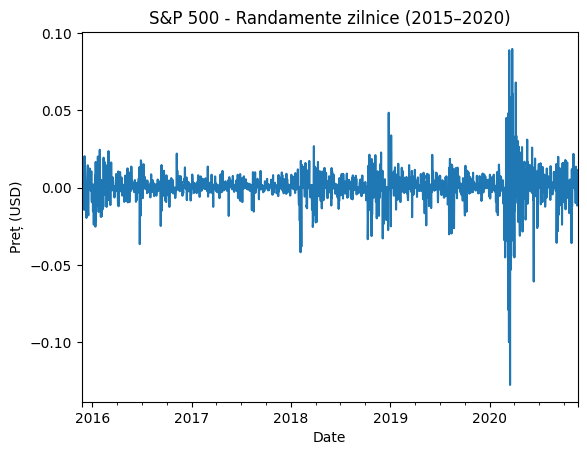

In [27]:
# Plot - Pre»õ ajustat real
sp500['Close'].plot(title='S&P 500 - Pre»õ de inchidere (2015‚Äì2020)')
plt.ylabel("Pre»õ (USD)")
plt.grid(True)
plt.show()

# Plot - Pre»õ ajustat randamente logartimice
sp500_log_returns['Close'].plot(title='S&P 500 - Randamente zilnice (2015‚Äì2020)')
plt.ylabel("Pre»õ (USD)")
plt.show()

# **üìà Evolu»õia S&P 500 (2015‚Äì2020)**

**üîπ Observa»õii tehnice:**

Trend general ascendent √Æntre 2016 »ôi √Ænceputul lui 2020.

Corec»õii semnificative la finalul lui 2018 »ôi √Æn martie 2020.

Volatilitate crescutƒÉ √Æn perioadele de incertitudine economicƒÉ.

**üîπ Evenimente economice relevante:**

2015‚Äì2016: √éngrijorƒÉri legate de economia Chinei »ôi scƒÉderea pre»õului petrolului.

2018: Tensiuni comerciale √Æntre SUA »ôi China; majorarea ratelor dob√¢nzilor de cƒÉtre FED.

2020: Pandemia COVID-19 a provocat o scƒÉdere rapidƒÉ de aproximativ 34% √Æn martie, urmatƒÉ de o revenire sus»õinutƒÉ de stimulente fiscale »ôi monetare.

***‚è©‚è©‚è©Deoarece trendul este stochastic (Seria urcƒÉ sau coboarƒÉ la √Ænt√¢mplare, cu "salturi" de la o perioadƒÉ la alta) am aplicat diferentierea prin logaritmarea randametelor pentru a obtine un trend deterministic.***

# **üìä Randamente zilnice S&P 500**

**üîπ Observa»õii tehnice:**

Randamente relativ stabile √Æn perioadele de cre»ôtere economicƒÉ.

Spike-uri semnificative √Æn perioadele de crizƒÉ, indic√¢nd volatilitate ridicatƒÉ.

Distribu»õie leptokurticƒÉ: frecven»õƒÉ crescutƒÉ a valorilor extreme.

**üîπ Interpretare:**

Randamentele zilnice sunt √Æn general sta»õionare, dar prezintƒÉ heteroscedasticitate √Æn perioadele de stres economic.

Modelarea volatilitƒÉ»õii poate fi eficient realizatƒÉ prin modele ARCH/GARCH.

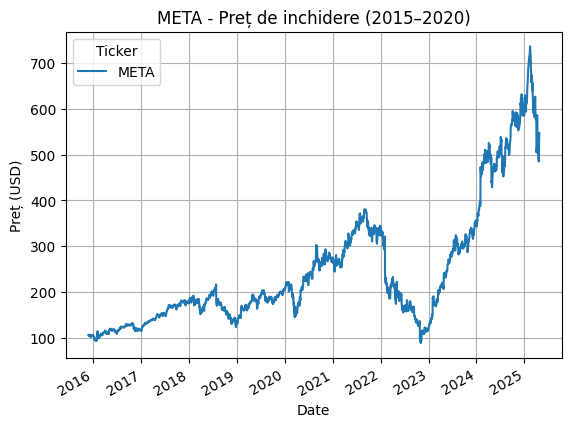

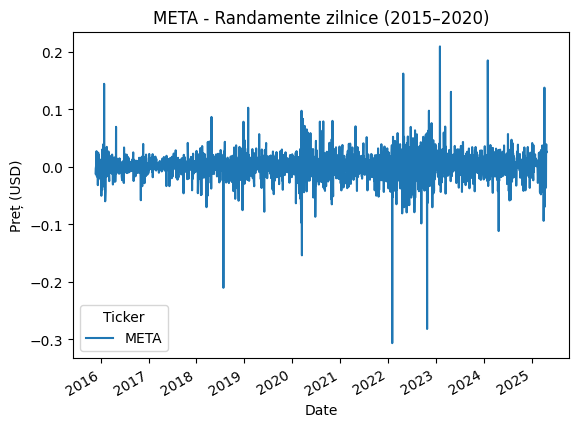

In [28]:
# Plot - Pre»õ ajustat real
meta['Close'].plot(title='META - Pre»õ de inchidere (2015‚Äì2020)')
plt.ylabel("Pre»õ (USD)")
plt.grid(True)
plt.show()

#Plot pentru log randamente
meta_log_returns['Close'].plot(title='META - Randamente zilnice (2015‚Äì2020)')
plt.ylabel("Pre»õ (USD)")
plt.show()

# **üìà Evolu»õia META (2015‚Äì2020)**

**üîπ Observa»õii tehnice:**

Trend ascendent stabil p√¢nƒÉ √Æn 2021, urmat de volatilitate ridicatƒÉ.

Corec»õie masivƒÉ √Æn 2022, apoi revenire acceleratƒÉ √Æn 2023‚Äì2024.

Volatilitate extrem de mare la sf√¢r»ôitul perioadei (2024‚Äì2025).

**üîπ Evenimente economice relevante:**

2021: Cre»ôtere datoratƒÉ expansiunii platformelor Meta »ôi optimismului tehnologic.

2022: Corec»õie severƒÉ cauzatƒÉ de scƒÉderea veniturilor, criza publicitƒÉ»õii online »ôi incertitudini macroeconomice (rƒÉzboiul Rusia-Ucraina, infla»õie ridicatƒÉ).

2023‚Äì2024: Revenire puternicƒÉ pe fondul investi»õiilor √Æn AI »ôi eficientizƒÉrii opera»õionale.

2025: Volatilitate crescutƒÉ posibil asociatƒÉ cu ajustƒÉri de pia»õƒÉ »ôi politici restrictive.

***‚è©‚è©‚è©Deoarece trendul este stochastic (Seria urcƒÉ sau coboarƒÉ la √Ænt√¢mplare, cu "salturi" de la o perioadƒÉ la alta) am aplicat diferentierea prin logaritmarea randametelor pentru a obtine un trend deterministic.***

# **üìä Randamente zilnice META**

**üîπ Observa»õii tehnice:**

Randamente relativ stabile p√¢nƒÉ √Æn 2021.

Spike-uri majore √Æn 2022 »ôi 2023, indic√¢nd »ôocuri de pia»õƒÉ.

Distribu»õie leptokurticƒÉ: valori extreme mai frecvente dec√¢t √Æntr-o distribu»õie normalƒÉ.

**üîπ Interpretare:**

Randamentele zilnice sunt √Æn general sta»õionare, dar volatilitatea variazƒÉ puternic √Æn crize.

Modelarea volatilitƒÉ»õii este recomandatƒÉ folosind modele ARCH/GARCH pentru a surprinde dinamica varia»õiei randamentelor.

In [77]:
def analiza_trend(series, title=''):
    print(f'=== Analiza trend pentru {title} ===\n')

    # 2. Test ADF
    adf = ADF(series, trend='ct')
    print(adf.summary(),'\n')
    adf_stationary = adf.pvalue < 0.05

    # 3. Test KPSS
    kpss_test = KPSS(series, trend='ct')
    print(kpss_test.summary(),'\n')
    kpss_stationary = kpss_test.pvalue > 0.05

    # 4. Test Phillips-Perron
    pp = PhillipsPerron(series, trend='ct')
    print(pp.summary(),'\n')
    pp_stationary = pp.pvalue < 0.05

    # 5. Concluzie automatƒÉ
    print('--- Concluzie ---')
    if adf_stationary and pp_stationary and kpss_stationary:
        print(f'Seria {title} are un trend determinist.')
    elif not adf_stationary and not pp_stationary and not kpss_stationary:
        print(f'Seria {title} are un trend stochastic.')
    else:
        print(f'Seria {title} necesitƒÉ o analizƒÉ mai detaliatƒÉ (rezultate mixte √Æntre teste).')
    print('=============================\n')

analiza_trend(sp500['Close'], title='S&P 500 - Close')
analiza_trend(sp500_log_returns['Close'], title='S&P 500 - Close')

=== Analiza trend pentru S&P 500 - Close ===

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.173
P-value                         0.005
Lags                               23
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary. 

    KPSS Stationarity Test Results   
Test Statistic                  0.209
P-value                         0.012
Lags                               27
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root. 

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -4.149
P-value                         0.005
Lags                               25
-------------------

In [78]:
analiza_trend(meta['Close'], title='S&P 500 - Close')
analiza_trend(meta_log_returns['Close'], title='S&P 500 - Close')

=== Analiza trend pentru S&P 500 - Close ===

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.420
P-value                         0.855
Lags                                4
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary. 

    KPSS Stationarity Test Results   
Test Statistic                  0.667
P-value                         0.000
Lags                               29
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root. 

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.553
P-value                         0.810
Lags                               27
-------------------

<Figure size 1000x500 with 0 Axes>

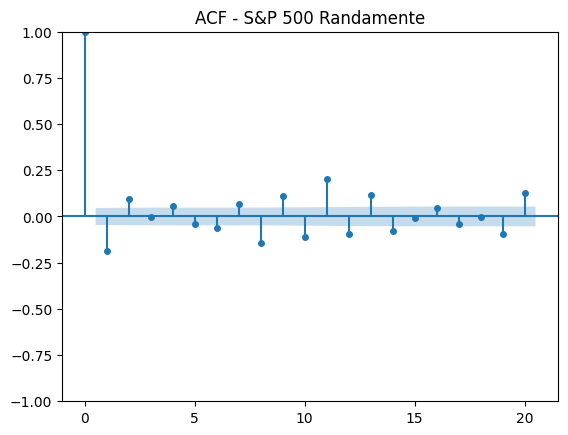

<Figure size 1000x500 with 0 Axes>

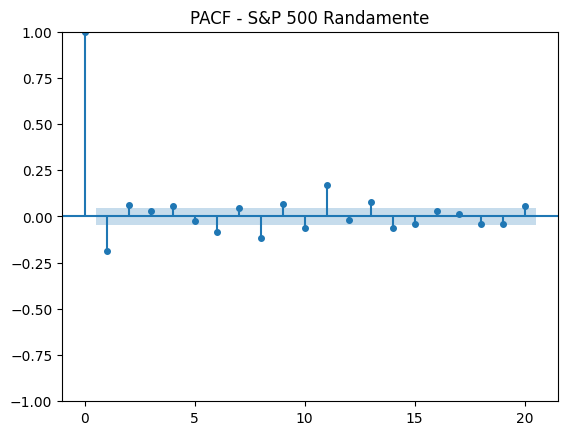

In [47]:
# ACF (pentru q ‚Äì partea MA)
plt.figure(figsize=(10, 5))
plot_acf(sp500_log_returns['Close'], lags=20, markersize=4)
plt.title('ACF - S&P 500 Randamente')
plt.show()

# PACF (pentru p ‚Äì partea AR)
plt.figure(figsize=(10, 5))
plot_pacf(sp500_log_returns['Close'], lags=20, markersize=4)
plt.title('PACF - S&P 500 Randamente')
plt.show()

<Figure size 1000x500 with 0 Axes>

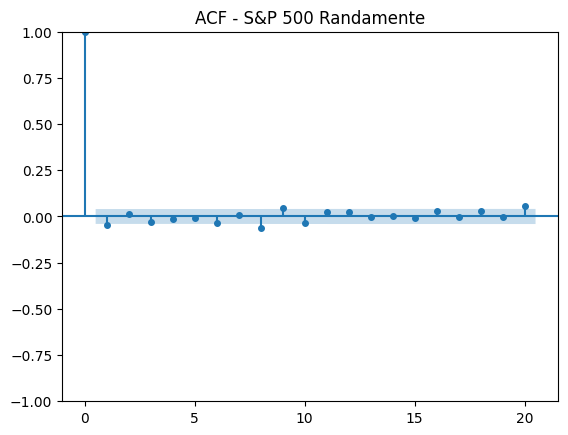

<Figure size 1000x500 with 0 Axes>

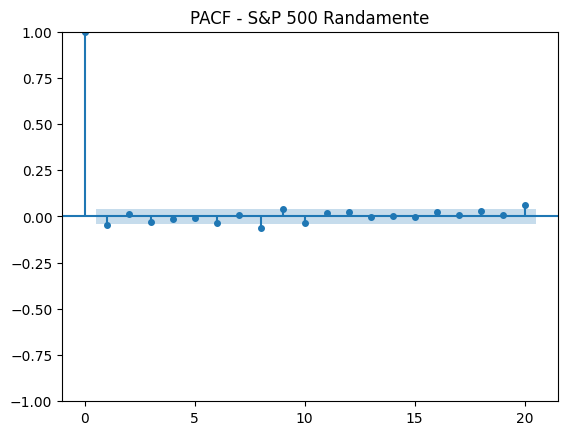

In [48]:
# ACF (pentru q ‚Äì partea MA)
plt.figure(figsize=(10, 5))
plot_acf(meta_log_returns['Close'], lags=20, markersize=4)
plt.title('ACF - S&P 500 Randamente')
plt.show()

# PACF (pentru p ‚Äì partea AR)
plt.figure(figsize=(10, 5))
plot_pacf(meta_log_returns['Close'], lags=20, markersize=4)
plt.title('PACF - S&P 500 Randamente')
plt.show()

In [84]:
#META
model_meta_arma = ARIMA(meta['Close'], order=(1, 0, 1))
fitted = model_meta_arma.fit()
print(fitted.summary())


model_meta_arima = ARIMA(meta_log_returns['Close'], order=( 1, 0, 1))
fitted = model_meta_arima.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                   META   No. Observations:                 2369
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7859.080
Date:                Sun, 27 Apr 2025   AIC                          15726.160
Time:                        20:21:08   BIC                          15749.241
Sample:                             0   HQIC                         15734.562
                               - 2369                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        247.1913    543.819      0.455      0.649    -818.674    1313.057
ar.L1          0.9997      0.001   1251.007      0.000       0.998       1.001
ma.L1         -0.0517      0.011     -4.603      0.0

In [85]:
#S&P500
model_sp500 = ARIMA(sp500_log_returns['Close'], order=(2, 0, 2))
fitted = model_sp500.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1824
Model:                 ARIMA(2, 0, 2)   Log Likelihood                5816.010
Date:                Sun, 27 Apr 2025   AIC                         -11620.021
Time:                        20:21:51   BIC                         -11586.968
Sample:                    11-24-2015   HQIC                        -11607.828
                         - 11-20-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.181      0.238      -0.000       0.001
ar.L1         -0.0852      0.214     -0.397      0.691      -0.505       0.335
ar.L2         -0.0695      0.081     -0.862      0.3

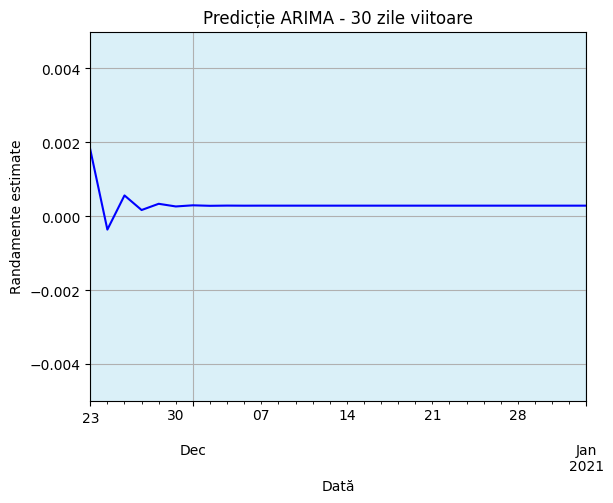

In [51]:
forecast = fitted.get_forecast(steps=30)
forecast_df = forecast.summary_frame()

# SetƒÉm index cu date reale
last_date = sp500_log_returns['Close'].index[-1]
forecast_df.index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')

# Plot mai clar
forecast_df['mean'].plot(title='Predic»õie ARIMA - 30 zile viitoare', color='blue')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='skyblue', alpha=0.3)
plt.ylabel('Randamente estimate')
plt.xlabel('DatƒÉ')
plt.grid(True)
plt.ylim(-0.005, 0.005)  # zoom pe varia»õie micƒÉ (~¬±0.5%)
plt.show()


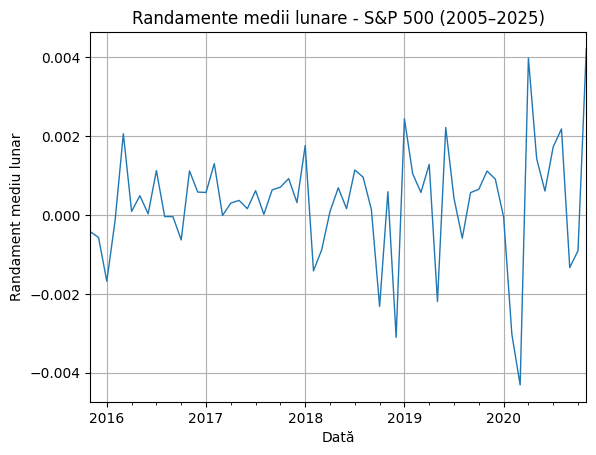

In [53]:
# AgregƒÉm randamentele la nivel de lunƒÉ calendaristicƒÉ
sp500_monthly_returns = sp500_log_returns['Close'].resample('M').mean()

# Line chart pentru √Æntreaga perioadƒÉ 2005‚Äì2025
sp500_monthly_returns.plot(title='Randamente medii lunare - S&P 500 (2005‚Äì2025)', linewidth=1)
plt.ylabel('Randament mediu lunar')
plt.xlabel('DatƒÉ')
plt.grid(True)
plt.show()

In [59]:
# Randamente medii trimestriale
quarterly_returns = sp500_log_returns['Close'].resample('Q').mean().dropna()

# SARIMA(p,d,q)(P,D,Q,s) ‚Üí alegem p=1, d=0, q=1 »ôi sezonalitate s=4 (trimestrialƒÉ)
model_q = SARIMAX(quarterly_returns, order=(1, 0, 1), seasonal_order=(1, 0, 1, 4))
results_q = model_q.fit(disp=False)

# Rezumat
print("=== SARIMA pe Randamente Trimestriale ===")
print(results_q.summary())

# Plot evolu»õie √Æn timp
sp500_quarterly_returns.plot(title='Randamente medii trimestriale - S&P 500 (2005‚Äì2025)', linewidth=1.5)
plt.ylabel('Randament mediu trimestrial')
plt.xlabel('DatƒÉ')
plt.grid(True)
plt.show()

=== SARIMA pe Randamente Trimestriale ===
                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                   21
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 4)   Log Likelihood                 116.921
Date:                           Sun, 27 Apr 2025   AIC                           -223.843
Time:                                   15:57:38   BIC                           -218.620
Sample:                               12-31-2015   HQIC                          -222.710
                                    - 12-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4018      0.519     -0.774      0.439      -1.419       0.616
m

NameError: name 'sp500_quarterly_returns' is not defined

In [60]:
from arch import arch_model

# PregƒÉtire: randamente logaritmice curate
sp500_log_returns = np.log(sp500 / sp500.shift(1)).replace([np.inf, -np.inf], np.nan).dropna()

# Model GARCH(1,1) fƒÉrƒÉ constantƒÉ √Æn media (mean='Zero')
garch_model = arch_model(sp500_log_returns['Close'], vol='GARCH', p=1, q=1, mean='Zero')
garch_fitted = garch_model.fit(disp='off')

# Rezumat
print(garch_fitted.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                6482.14
Distribution:                  Normal   AIC:                          -12958.3
Method:            Maximum Likelihood   BIC:                          -12941.7
                                        No. Observations:                 1824
Date:                Sun, Apr 27 2025   Df Residuals:                     1824
Time:                        15:57:45   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.0034e-06  5.674e-10   3530.990      0.000 [2.

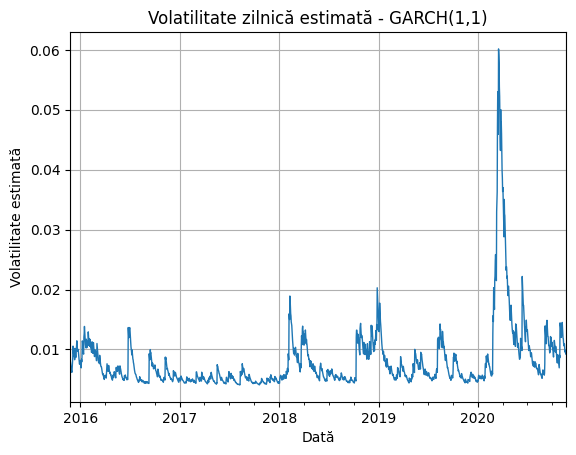

In [61]:
# Plot volatilitate condi»õionalƒÉ (volatilitatea estimatƒÉ √Æn fiecare zi)
garch_fitted.conditional_volatility.plot(title='Volatilitate zilnicƒÉ estimatƒÉ - GARCH(1,1)', linewidth=1)
plt.ylabel('Volatilitate estimatƒÉ')
plt.xlabel('DatƒÉ')
plt.grid(True)
plt.show()

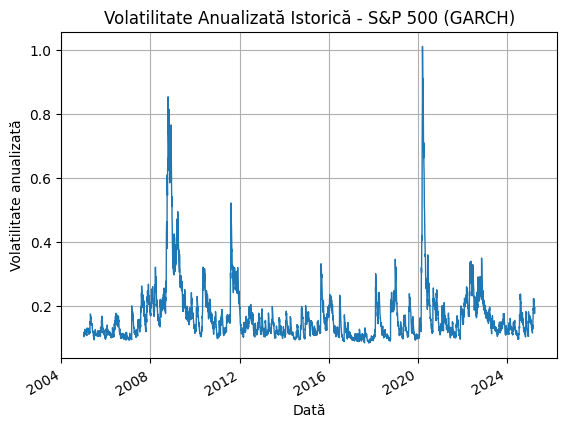

In [ ]:
# Volatilitate anualizatƒÉ istoricƒÉ
vol_anualizata_istoric = garch_fitted.conditional_volatility * np.sqrt(252)

# Plot istoric
vol_anualizata_istoric.plot(title='Volatilitate AnualizatƒÉ IstoricƒÉ - S&P 500 (GARCH)', linewidth=1)
plt.ylabel('Volatilitate anualizatƒÉ')
plt.xlabel('DatƒÉ')
plt.grid(True)
plt.show()

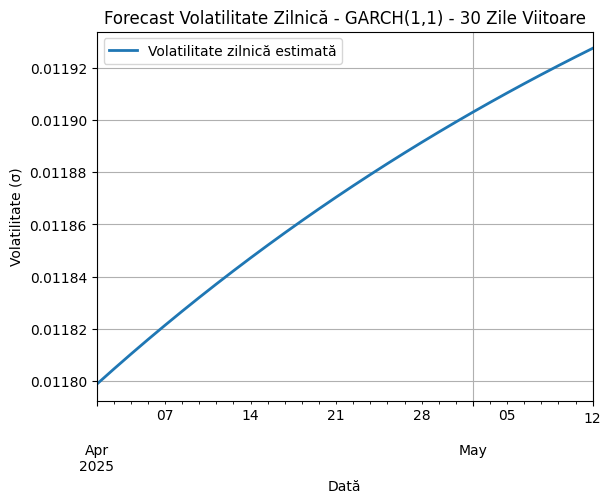

In [ ]:
# Forecast volatilitate pentru 30 de zile viitoare
garch_forecast = garch_fitted.forecast(horizon=30)

# Extragem volatilitatea condi»õionalƒÉ (devia»õia standard)
forecast_vol = np.sqrt(garch_forecast.variance.values[-1, :])

# CreƒÉm un index de date pentru urmƒÉtoarele 30 de zile lucrƒÉtoare
last_date = sp500_log_returns.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')

# SalvƒÉm √Æntr-un DataFrame
forecast_df = pd.DataFrame({
    'Volatilitate zilnicƒÉ estimatƒÉ': forecast_vol
}, index=forecast_dates)

# Plot
forecast_df.plot(title='Forecast Volatilitate ZilnicƒÉ - GARCH(1,1) - 30 Zile Viitoare', linewidth=2)
plt.ylabel('Volatilitate (œÉ)')
plt.xlabel('DatƒÉ')
plt.grid(True)
plt.show()

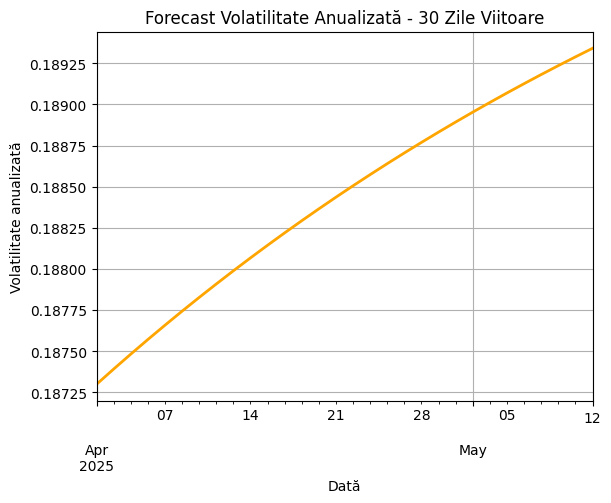

In [ ]:
# Forecast anualizat
forecast_df['Volatilitate anualizatƒÉ estimatƒÉ'] = forecast_df['Volatilitate zilnicƒÉ estimatƒÉ'] * np.sqrt(252)

# Plot
forecast_df['Volatilitate anualizatƒÉ estimatƒÉ'].plot(title='Forecast Volatilitate AnualizatƒÉ - 30 Zile Viitoare', linewidth=2, color='orange')
plt.ylabel('Volatilitate anualizatƒÉ')
plt.xlabel('DatƒÉ')
plt.grid(True)
plt.show()

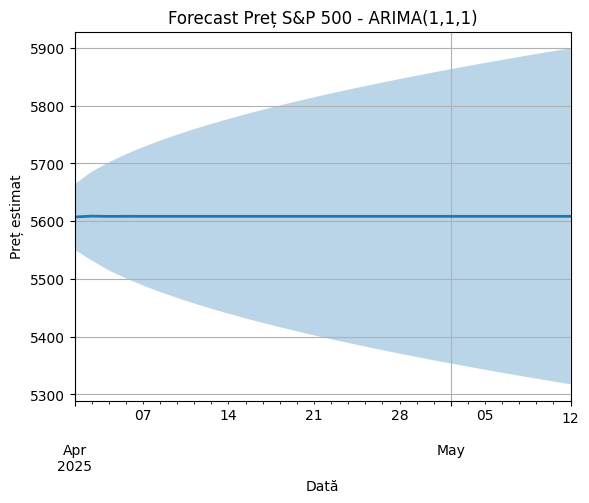

In [ ]:
# Model ARIMA(1,1,1) pentru pre»õ (diferen»õiere o datƒÉ - d=1)
model_price = ARIMA(sp500, order=(1,1,1))
fitted_price = model_price.fit()

# Forecast pentru 30 zile viitoare
forecast_price = fitted_price.get_forecast(steps=30)
forecast_price_df = forecast_price.summary_frame()

# GenerƒÉm index de date viitoare
forecast_price_df.index = pd.date_range(start=sp500.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')

# Plot
forecast_price_df['mean'].plot(title='Forecast Pre»õ S&P 500 - ARIMA(1,1,1)', linewidth=2)
plt.fill_between(forecast_price_df.index, forecast_price_df['mean_ci_lower'], forecast_price_df['mean_ci_upper'], alpha=0.3)
plt.ylabel('Pre»õ estimat')
plt.xlabel('DatƒÉ')
plt.grid(True)
plt.show()